In [1]:
library(tidyverse)
library(magrittr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [2]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.21.3, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘rstan’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: cmdstanr

This is cmdstanr version 0.4.0.9001

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /Users/marcoe02/.cmdstan/cmdstan-2.28.2

- CmdStan version: 2.28.2

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:purrr’:

    map


The following object is masked from ‘pa

In [3]:
library(bayesplot)
library(bayestestR)

This is bayesplot version 1.8.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



In [4]:
library(brms)

Loading required package: Rcpp

Loading 'brms' package (version 2.16.3). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following objects are masked from ‘package:rethinking’:

    LOO, stancode, WAIC


The following object is masked from ‘package:rstan’:

    loo


The following object is masked from ‘package:stats’:

    ar


The following object is masked from ‘.env’:

    s




In [5]:
theme_set(theme_bw())

In [6]:
options(mc.cores = parallel::detectCores())

In [7]:
options(brms.backend = "cmdstanr")

In [8]:
rstan_options(auto_write = TRUE)

In [9]:
set.seed(1969)

In [10]:
size <- 200
true_intercept <- 1
true_slope <- 2

x <- seq(0, 1, length.out = size)

# y = a + b * x
true_regression_line <- true_intercept + true_slope * x

# add noise
y <- true_regression_line + rnorm(size, sd = 0.5)

data <- tibble(x = x, y = y, true_regression_line = true_regression_line)

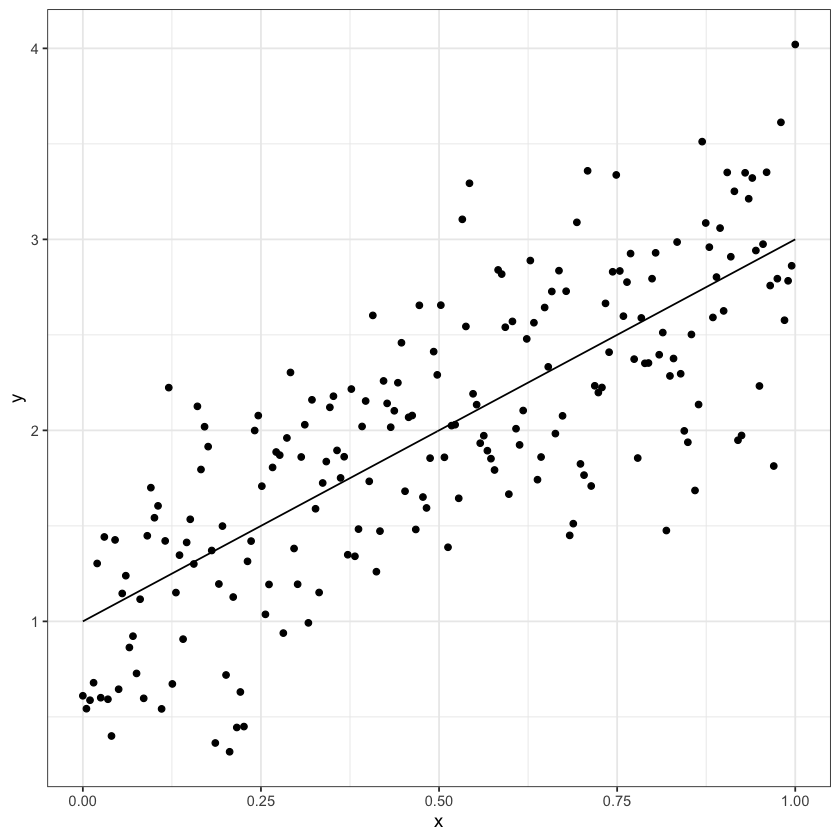

In [11]:
data %>%
    ggplot(aes(x = x, y = y)) +
    geom_point() +
    geom_line(aes(y = true_regression_line))

In [12]:
model_rethinking <- ulam(
    alist(
        y ~ dnorm(mu, sigma),
        mu <- a + b * x,
        a ~ dnorm(0, 20),
        b ~ dnorm(0, 20),
        sigma ~ dexp(1)
    ),
    data
)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.


In [13]:
summary(model_rethinking)

Inference for Stan model: ulam_cmdstanr_b8c3201564df776ded6f7df16abe0357-202201261744-1-809dfe.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean   sd  2.5%   25%   50%   75% 97.5% n_eff Rhat
a      0.97    0.00 0.07  0.85  0.93  0.97  1.02  1.11   259    1
b      2.01    0.01 0.12  1.76  1.94  2.01  2.08  2.21   302    1
sigma  0.49    0.00 0.02  0.44  0.47  0.48  0.50  0.53   262    1
lp__  44.18    0.10 1.34 40.69 43.75 44.47 45.11 45.57   199    1

Samples were drawn using NUTS(diag_e) at Wed Jan 26 17:44:34 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


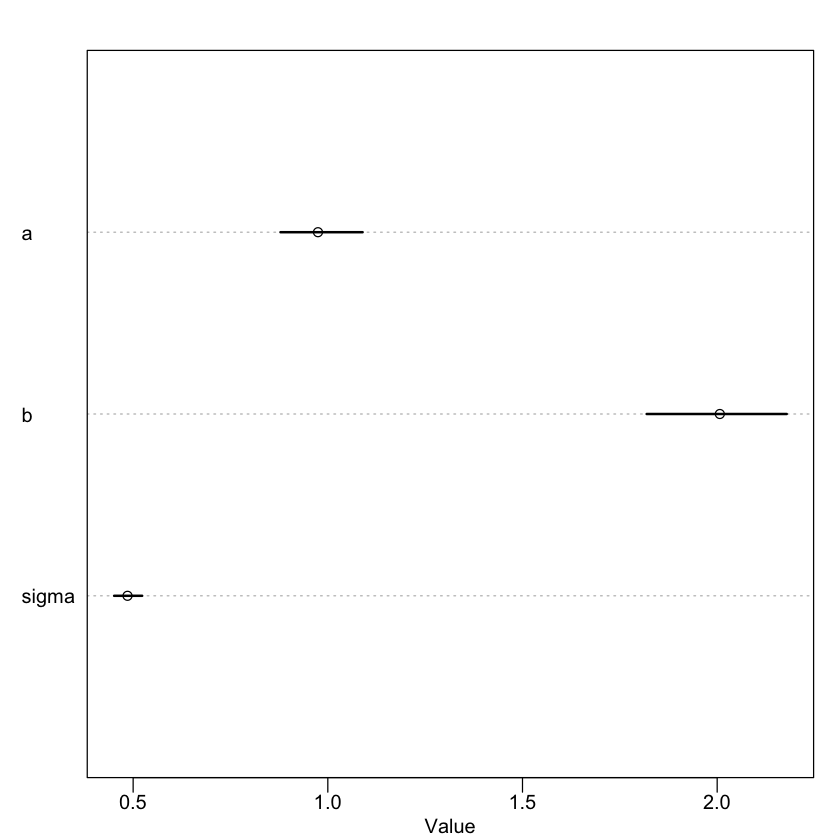

In [14]:
plot(model_rethinking)

In [15]:
model_brms <- brm(y ~ 1 + x, data)

Start sampling



Running MCMC with 4 chains, at most 12 in parallel...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 1 Iteration: 1700 / 2000 [ 85%]  (Sampling)

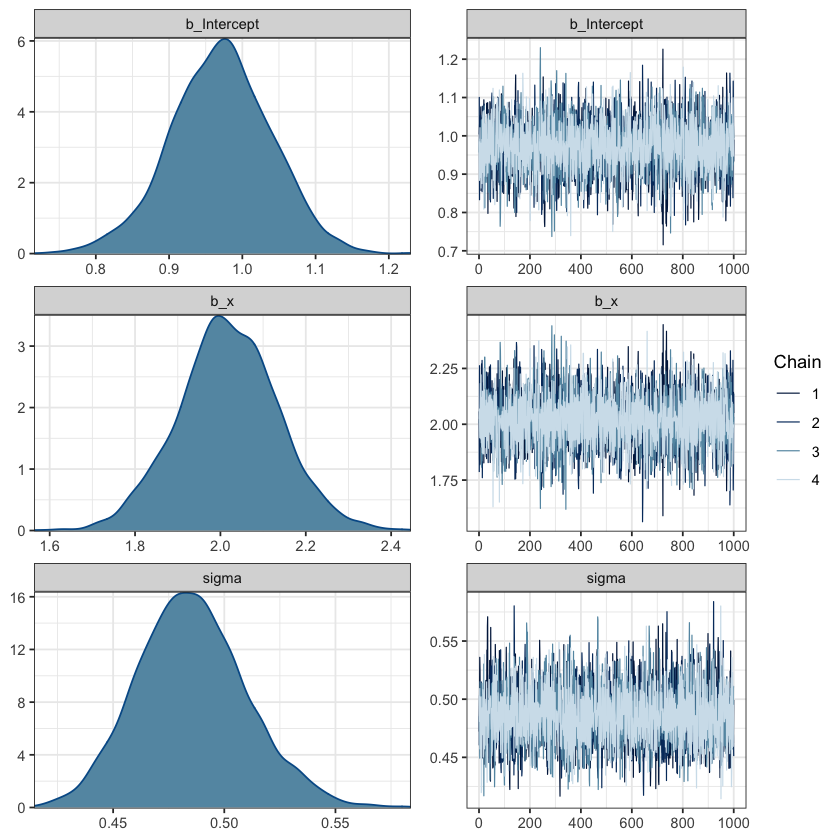

In [16]:
plot(model_brms)

In [17]:
summary(model_brms)

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y ~ 1 + x 
   Data: data (Number of observations: 200) 
  Draws: 4 chains, each with iter = 1000; warmup = 0; thin = 1;
         total post-warmup draws = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.97      0.07     0.83     1.10 1.00     4241     2567
x             2.02      0.12     1.79     2.25 1.00     4661     3062

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     0.49      0.02     0.44     0.54 1.00     4158     2906

Draws were sampled using sample(hmc). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

In [18]:
describe_posterior(model_brms)

,Parameter,Median,CI,CI_low,CI_high,pd,ROPE_CI,ROPE_low,ROPE_high,ROPE_Percentage,Rhat,ESS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,b_Intercept,0.9715,0.95,0.8311,1.102,1,0.95,-0.07587,0.07587,0,1.000,4207
2,b_x,2.0162,0.95,1.7800,2.243,1,0.95,-0.07587,0.07587,0,1.001,4626


In [19]:
summary(lm(y ~ 1 + x, data))


Call:
lm(formula = y ~ 1 + x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1480 -0.3482  0.0251  0.3653  1.2276 

Coefficients:
            Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   0.9711     0.0679    14.3 <0.0000000000000002 ***
x             2.0176     0.1175    17.2 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.482 on 198 degrees of freedom
Multiple R-squared:  0.598,	Adjusted R-squared:  0.596 
F-statistic:  295 on 1 and 198 DF,  p-value: <0.0000000000000002
